### Agglomerative clustering

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

c:\Users\chiar\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = load_dataset('csv', data_files='../dataset/Cyclists_FE_Aggregated.csv')

df = dataset['train'].to_pandas()

In [4]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

columns = ['height', 'weight', 'avg_prestige_weighted_delta']
df_reduced = df.drop(columns=columns)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_reduced.select_dtypes(include=['float64', 'int64']))

# Applicazione della PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Calcoliamo la varianza spiegata per ciascuna componente principale
explained_variance_ratio = pca.explained_variance_ratio_

# Mostriamo la varianza spiegata cumulativa
explained_variance_cumulative = explained_variance_ratio.cumsum()

# Creazione di un DataFrame per mostrare i risultati
pca_summary = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': explained_variance_cumulative
})

pca_summary

,Component,Explained Variance Ratio,Cumulative Explained Variance
0,PC1,0.275122,0.275122
1,PC2,0.205158,0.480281
2,PC3,0.199980,0.680260
3,PC4,0.195693,0.875953
4,PC5,0.124047,1.000000


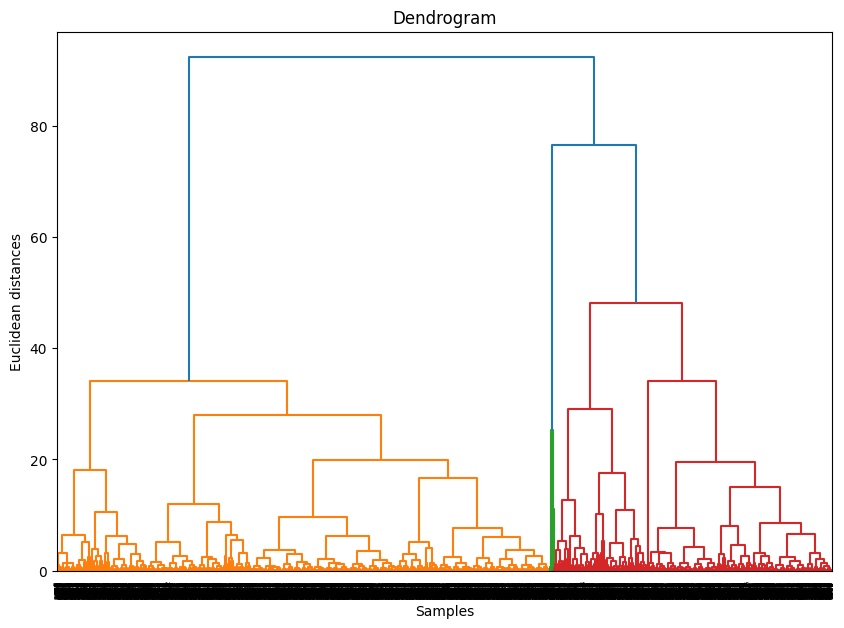

In [5]:
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(X_scaled)

pca_selected_components = pca_result[:, :2]

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(pca_selected_components, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [6]:
hierarchical_clustering = AgglomerativeClustering()
df_reduced['hierarchical_cluster_ward'] = hierarchical_clustering.fit_predict(pca_selected_components)

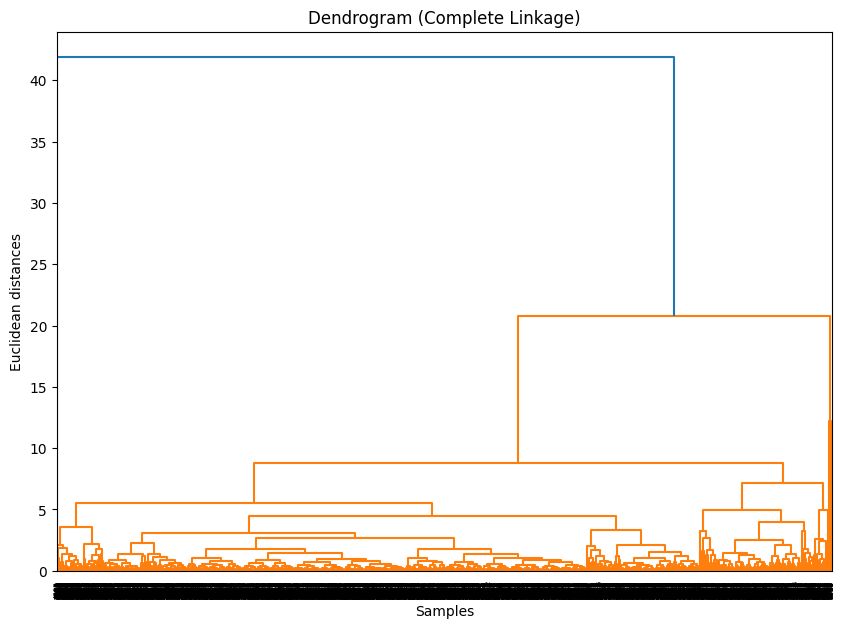

In [7]:
plt.figure(figsize=(10, 7))
dendrogram_complete = sch.dendrogram(sch.linkage(pca_selected_components, method='complete'))
plt.title('Dendrogram (Complete Linkage)')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [8]:
hierarchical_clustering = AgglomerativeClustering()
df_reduced['hierarchical_cluster_complete'] = hierarchical_clustering.fit_predict(pca_selected_components)

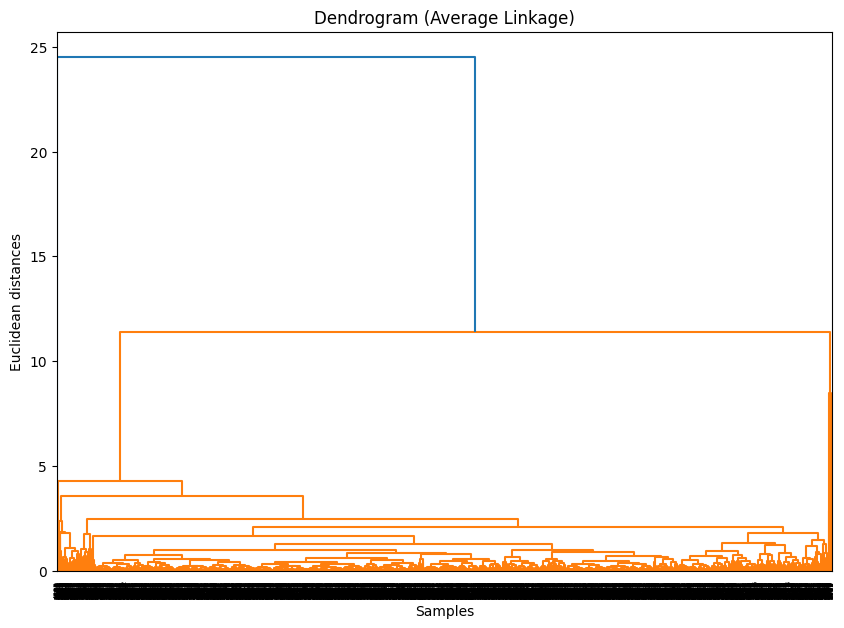

In [9]:
plt.figure(figsize=(10, 7))
dendrogram_average = sch.dendrogram(sch.linkage(pca_selected_components, method='average'))
plt.title('Dendrogram (Average Linkage)')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [10]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=3)
df_reduced['hierarchical_cluster_average'] = hierarchical_clustering.fit_predict(pca_selected_components)